In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_churn=pd.read_csv('data/churn_data.csv')

In [4]:
data_churn.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


In [7]:
data_null=data_churn.isnull().sum()


In [8]:
data_null

user                          0
churn                         0
age                           4
housing                       0
credit_score               8031
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             3227
reward_rate                   0
is_referred                   0
dtype: i

In [9]:
data_churn.shape

(27000, 31)

In [12]:
data_machine_churn=data_churn[['age','housing','credit_score','purchases_partners','cc_taken',
                              'app_web_user','payment_type','received_loan','rejected_loan',
                               'left_for_two_month_plus','left_for_one_month','rewards_earned','churn'
                              ]]

In [14]:
data_machine_churn.head()

,age,housing,credit_score,purchases_partners,cc_taken,app_web_user,payment_type,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,churn
0,37.0,na,NaN,0,0,1,Bi-Weekly,0,0,1,0,NaN,0
1,28.0,R,486.0,1,0,1,Weekly,0,0,0,0,44.0,0
2,35.0,R,561.0,86,0,0,Semi-Monthly,0,0,1,0,65.0,0
3,26.0,R,567.0,38,0,0,Bi-Weekly,0,0,0,0,33.0,0
4,27.0,na,NaN,2,0,1,Bi-Weekly,0,0,1,0,1.0,1


In [17]:
data_machine_churn['age'].fillna((data_machine_churn['age'].mean()),inplace=True)

C:\Users\avaithil\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [19]:
data_null=data_machine_churn.isnull().sum()
data_null

age                           0
housing                       0
credit_score               8031
purchases_partners            0
cc_taken                      0
app_web_user                  0
payment_type                  0
received_loan                 0
rejected_loan                 0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             3227
churn                         0
dtype: int64

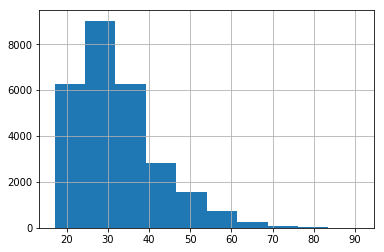

In [23]:
#Historgram to analyze the frequency of age in the data
data_machine_churn.age.hist()

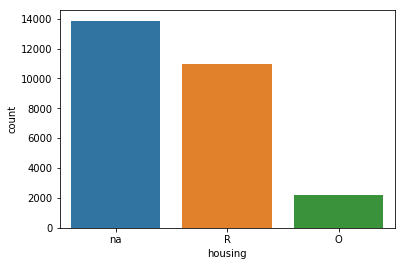

In [31]:
# To determine the count of each type of housing 
sns.countplot(x='housing', data=data_machine_churn)